# Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:

study_hours = np.array([2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5])
grades = np.array([55, 60, 65, 68, 72, 75, 78, 82, 85, 88, 90, 92, 94, 96, 98])

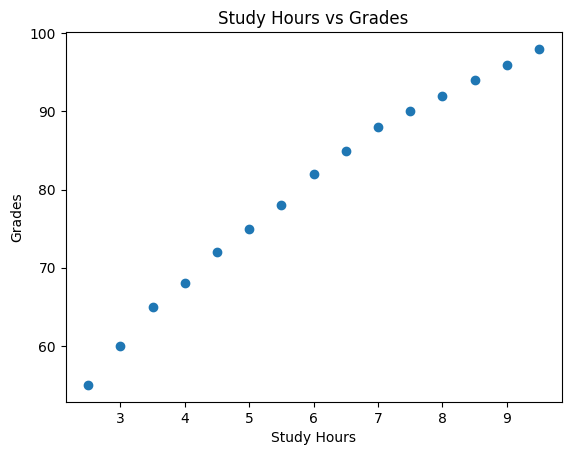

In [3]:
plt.scatter(study_hours,grades)
plt.xlabel("Study Hours")
plt.ylabel("Grades")
plt.title("Study Hours vs Grades")
plt.show()

The cost function defined as, 

$$\
J(w, b) = \frac{1}{2m} \sum_{k=1}^{m} \left( w x_k + b - y_k \right)^2
$$

In [4]:
def cost_function(x, y, w, b):
    total = 0
    for i in range(0,len(x)):
        total += ((w*x[i] + b) - y[i])**2
    cost = (1/(2*len(x)))*total
    return cost

## Gradient Descent

Goal: Given a surface $J(\mathbf{x})$ in $\mathbb{R^n}$, and a seed value $x_0 \in \mathbb{R^n}$. Surf along the surface and reach a local minima

Let $J(w,b)$ be the surface. Define the iteration scheme as follows

$$w_{n+1} = w_n - \alpha \frac{\partial J(w,b)}{\partial w}$$
$$b_{n+1} = b_n - \alpha \frac{\partial J(w,b)}{\partial b}$$

$(w_n,b_n)$ denote the $n^{th}$ coordiate on the surface

vectorically, $$\mathbf{x_{n+1}} = \mathbf{x_{n}} - \alpha  \nabla J(x,y)$$

when $n = 2$,

The gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$

In [5]:
def gradient(x, y, w, b):
    djdw = 0
    djdb = 0
    
    for i in range(0,len(x)):
        error = w*x[i]+ b - y[i]
        djdw = djdw + error*x[i]
        djdb = djdb + error
    djdw = (1/len(x))*djdw
    djdb = (1/len(x))*djdb
    return djdw, djdb

In [6]:
def gradient_descent(x, y, w_0, b_0, cost_function, alpha, epochs):
    w,b = w_0, b_0
    for i in range(epochs):
        djdw, djdb = gradient(x, y , w, b)
        w = w - alpha * djdw
        b = b - alpha * djdb
        if i%100 == 0:
            print(f"Epoch: {i} Cost: {cost_function(x, y, w, b)}")
    return w, b

# Traning

In [7]:
fit_w, fit_b = gradient_descent(study_hours,grades, 0, 0, cost_function, alpha = 1.0e-2, epochs = 10000)

print(f"The fitted slope is {fit_w}, fitted intercept is {fit_b}")

Epoch: 0 Cost: 1186.0583227037037
Epoch: 100 Cost: 81.72002271279794
Epoch: 200 Cost: 65.60534223980463
Epoch: 300 Cost: 52.734054129890346
Epoch: 400 Cost: 42.45336268918402
Epoch: 500 Cost: 34.241860033315305
Epoch: 600 Cost: 27.683081739439523
Epoch: 700 Cost: 22.44438493679387
Epoch: 800 Cost: 18.260077591678126
Epoch: 900 Cost: 14.917943351432116
Epoch: 1000 Cost: 12.248478525225366
Epoch: 1100 Cost: 10.116295331461629
Epoch: 1200 Cost: 8.413255408576164
Epoch: 1300 Cost: 7.052985340120218
Epoch: 1400 Cost: 5.966496036920451
Epoch: 1500 Cost: 5.098683803642785
Epoch: 1600 Cost: 4.405535633653035
Epoch: 1700 Cost: 3.8518969925549404
Epoch: 1800 Cost: 3.4096888786368473
Epoch: 1900 Cost: 3.0564837345249134
Epoch: 2000 Cost: 2.774367984269277
Epoch: 2100 Cost: 2.5490335069291423
Epoch: 2200 Cost: 2.369051968740886
Epoch: 2300 Cost: 2.2252952100283054
Epoch: 2400 Cost: 2.1104722905023383
Epoch: 2500 Cost: 2.0187597131839663
Epoch: 2600 Cost: 1.9455060729429483
Epoch: 2700 Cost: 1.8869

# Fitted Graph

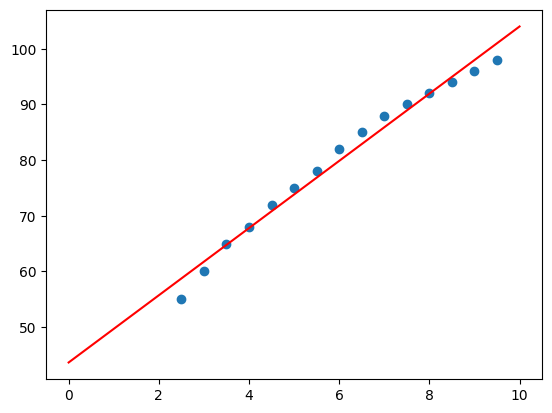

In [8]:
plt.scatter(study_hours,grades)
x = np.linspace(0,10,100)
y = 6.035795898302827*x+43.6518293279440
plt.plot(x, y, color = 'red')
plt.show()

In [9]:
optimal_w = 6.035795898302827
optimal_b = 43.6518293279440
cost = cost_function(study_hours,grades,optimal_w,optimal_b)

print(cost)

1.6548016047618546


## Plot of Error Function

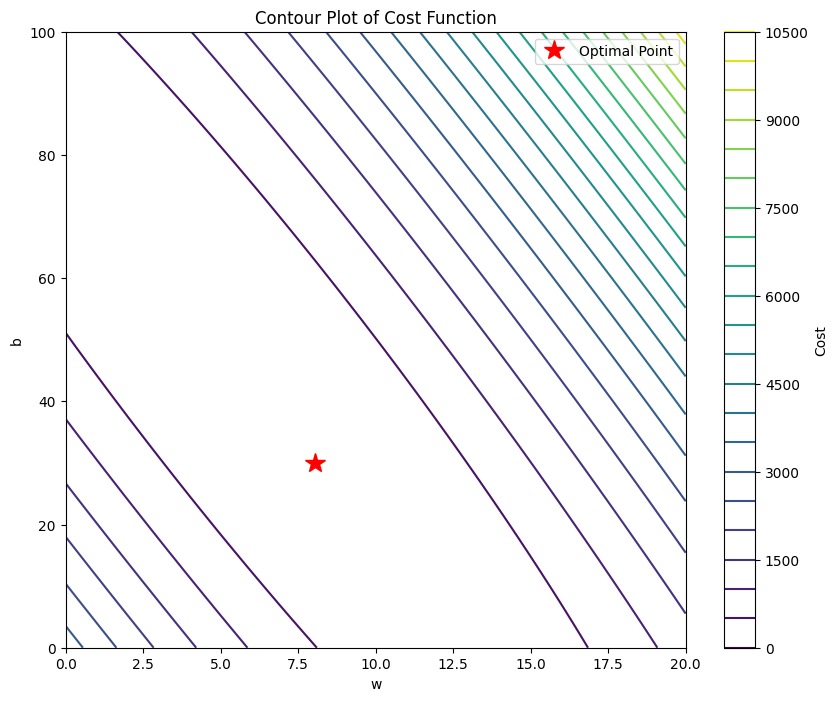

In [10]:
# Create a grid of points
x = np.linspace(0, 20, 100)  # w values
y = np.linspace(0, 100, 100)  # b values
X, Y = np.meshgrid(x, y)

# Calculate Z (cost) for each point
Z = cost_function(study_hours, grades, X, Y)

# Create the contour plot
plt.figure(figsize=(10, 8))
contour = plt.contour(X, Y, Z, levels=20, cmap='viridis')
plt.colorbar(contour, label='Cost')

# Add labels and title
plt.xlabel('w')
plt.ylabel('b')
plt.title('Contour Plot of Cost Function')

# Mark the optimal point
optimal_w = 8.048247546187577
optimal_b = 30.049546557453073
plt.plot(optimal_w, optimal_b, 'r*', markersize=15, label='Optimal Point')
plt.legend()

plt.show()